## 합성곱 신경망 (CNN)
* 이미지 인식, 음성 인식 등에 자주 사용되는데,<br>
특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용
    
* 컨볼류션 신경망의 등장
    * 얀 르쿤 교수의 논문에서 발표
        * 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리
    * 1998년 ~ 논문에서 LeNet-5 제시
    * 합성곱 층(convolution layer), 풀링 층 (pooling layer)소개
* 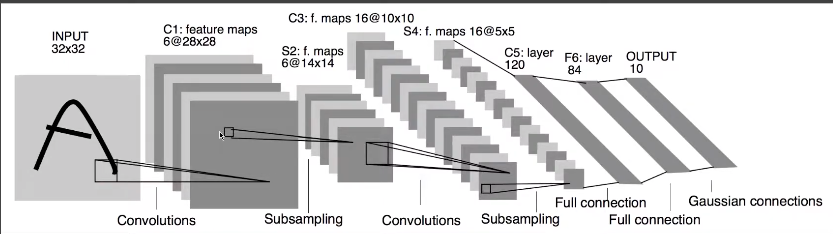

## 완전연결계층과의 차이
* 완전연결층은 이미지와 같은 데이터의 형상을 무시함 (3차원)
* 모든 입력데이터를 동등하게 취급 <br>
즉, 데이터의 특징을 잃어버리게됨
* 컨볼루션층은 이미지 픽셀 사이의 관계를 고려
* 완전 연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지
    * 이미지와 같은 2차원(흑백) 또는 3차원 (컬러)의 형상을 유지
    * 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 파라미터를 요구

## 컨볼루션 신경망 구조 예시
* 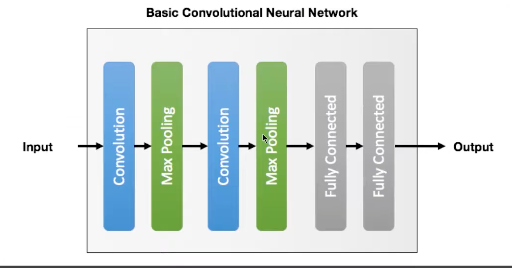

## 합성곱 연산
* filter 연산
    * 입력 데이터에 필터를 통한 어떠한 연산을 진행
    * 필터에 대응하는 원소끼리 곱하고, 그 합을 구함
    * 연산이 완료된 결과 데이터를 특징 맵(feature map)이라 부름
* filter
    * 커널(kernel)이라고도 함
    * 흔히 사진 어플에서 사용하는 이미지 필터와 비슷한 개념
    * 필터 사이즈는 거의 항상 홀수
        * 짝수면 패딩이 비대칭이되어버림
        * 왼쪽, 오른쪽을 다르게 주어야함
        * 중심위치가 존재, 즉 구별된 하나의 픽셀이 존재
    * 필터의 학습 파라미터 개수는 입력데이터의 크기와 상관없이 일정 따라서, 과적합을 방지할 수 있음
* 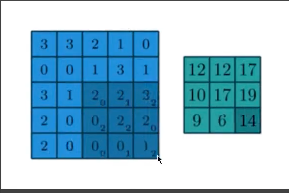
* 연산 시각화
    * 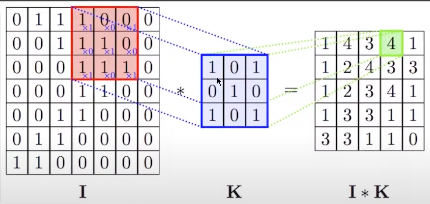
* 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는
    * (n-f+1) x (n-f+1)
        * n : 입력데이터의 크기
        * f : 필터(커널)의 크기

## 패딩과 스트라이드 (padding & stride)
* 필터 사이즈와 함께 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
* 사용자가 결정할 수 있음
### 패딩
* 입력데이터 주변을 특정 값으로 채우는 기법
    * 주로 0
    * 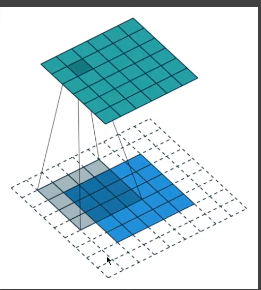
    * 출력 데이터의 크기
        * (n+2p-f+1) x (n+2p-f+1)
* valid와 same
    * valid
        * 패딩을 주지 않음
        * padding = 0 
    * same
        * 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함
        * if) 필터의 크기 = k <br>
        p = (k-1)/2 (단, stride=1)
        
## 스트라이드
* 필터를 적용하는 간격을 의미
* 아래는 간격=2
    * 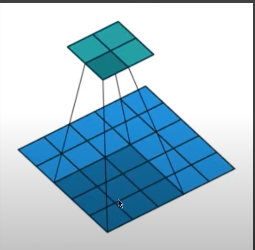
    * 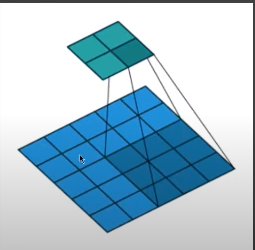
    * 중점을 기준으로 2칸씩
* 출력데이터의 크기
    * 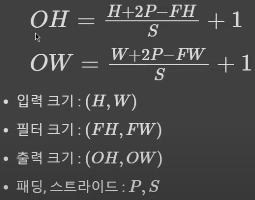
    * (주의)
        * 위 식의 값에서 결과가 정수로 나누어 떨어지는 값이어야함
        * 만약, 정수로 나누어 떨어지지 않으면 패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함

## 풀링 (pooling)
* 필터 사이즈 내에서 특정 값을 추출하는 과정
### 맥스 풀링
* 가장 많이 사용되는 방법
* 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
* 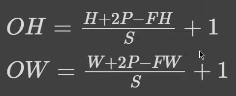
* 일반적으로 stride=2, kernel size=2를 통해 <strong>특징맵의 크기를 절반으로 줄이는 역할</strong>
* 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며, 컨볼루션 신경망이 이동 불변성 특성을 갖게해줌
    * 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는 2와 8의 위치를 바꾼다고 해도 맥스 풀링 연산은 8을 추출
* 모델의 파라미터 개수를 줄여주고, 연산속도도 빠르게 해줌
* 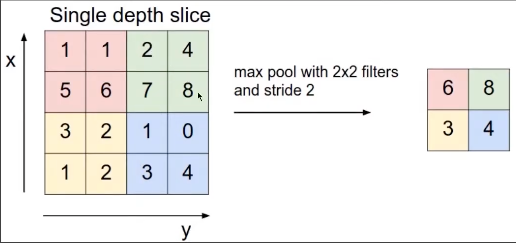

## 평균 풀링
* 필터 내의 있는 픽셀값의 평균을 구하는 과정
* 과거에 많이 사용, 요즘은 잘 사용하지 않는다.
* 맥스풀링과 마찬가지로 stride=2, kernel size=2

## 합성곱 연산의 의미
### 2차원 이미지에 대한 필터 연산 예시
* 가장 자리 검출 (edge-detection)
* 소벨 필터 (sobel filter)
    * horizontal : 가로 방향의 미분을 구하는 필터 역할
    * vertical : 세로 방향의 미분을 구하는 필터 역할
* 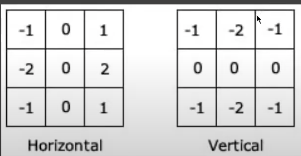

### import

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO #바이트 아이오 연산을 위해서


### util function

In [11]:
#url에서 이미지 가져오기
def url_to_image(url, gray=False): #이미지 배열로 변환, 그레이 스케일로 / 그냥 rgb로도
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()),dtype='uint8')
    
    if gray== True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image,cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    return image


def filtered_image(image, filter, output_size):
    #stride=1, padding=0
    filtered_img = np.zeros((output_size, output_size)) #비어있는 배열 공간 생성
    filter_size = filter.shape[0]
    
    for i in range(output_size):
        for j in range(output_size):
            multiply_values = image[i:(i+filter_size), j:(j+filter_size)] * filter
            sum_value = np.sum(multiply_values)
            
            if (sum_value>255):
                sum_value = 255
                
            filtered_img[i,j] = sum_value
            
    return filtered_img

### 이미지 확인

image.shape:  (440, 440)


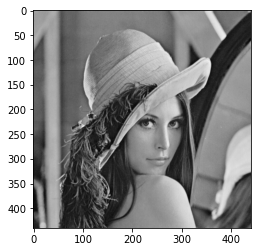

In [7]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'

image = url_to_image(img_url,gray=True)
print('image.shape: ',image.shape)

plt.imshow(image,cmap='gray')
plt.show()

### 필터 연산 적용

output size :  438


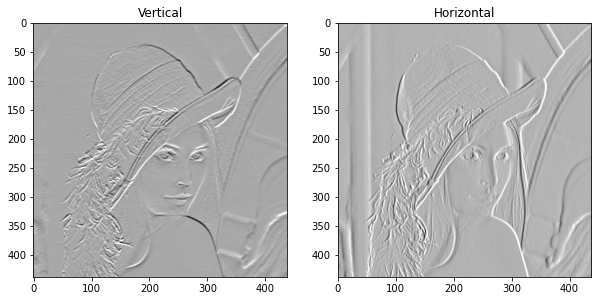

In [12]:
vertical_filter = np.array([[1.,2.,1.],
                            [0.,0.,0.],
                           [-1.,-2.,-1.]]) #가로로 0인 한줄

horizontal_filter = np.array([[1.,0.,-1.],
                             [2.,0.,-2.],
                             [1.,0.,-1.]]) #세로로 0인 한줄

output_size = int((image.shape[0]-3) / 1+1) # -3 : 패딩 사이즈
print('output size : ',output_size)

vertical_filtered = filtered_image(image,vertical_filter,output_size)
horizontal_filtered = filtered_image(image,horizontal_filter,output_size)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Vertical')
plt.imshow(vertical_filtered,cmap='gray')

plt.subplot(1,2,2)
plt.title('Horizontal')
plt.imshow(horizontal_filtered,cmap='gray')

plt.show()

#vertical : 세로 방향으로 edge가 잘 나타난 것을 알 수 있다.
#horizontal : 가로 방향으로 edge가 잘 나타난다.

### 이미지 필터를 적용한 최종 결과


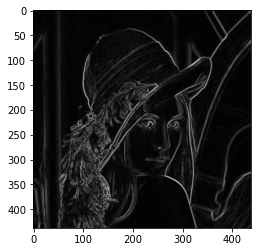

In [14]:
#루트 가로세로 제곱의 합
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))

plt.imshow(sobel_img,cmap='gray')

#두개의 필터 결과의 가로와 세로의 edge들이 두드러지게 나온걸 확인할 수 있다.
# 선명한 필터 : edge를 더 선명하게 바꿔서 적용해주는 것